In [1]:
a = []
while(1):
    a.append('1')

In [ ]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import cv2

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip '/content/drive/MyDrive/image fruit/train_zip.zip'

Archive:  /content/drive/MyDrive/image fruit/train_zip.zip
  inflating: train/apple_1.jpg       
  inflating: train/apple_1.xml       
  inflating: train/apple_10.jpg      
  inflating: train/apple_10.xml      
  inflating: train/apple_11.jpg      
  inflating: train/apple_11.xml      
  inflating: train/apple_12.jpg      
  inflating: train/apple_12.xml      
  inflating: train/apple_13.jpg      
  inflating: train/apple_13.xml      
  inflating: train/apple_14.jpg      
  inflating: train/apple_14.xml      
  inflating: train/apple_15.jpg      
  inflating: train/apple_15.xml      
  inflating: train/apple_16.jpg      
  inflating: train/apple_16.xml      
  inflating: train/apple_17.jpg      
  inflating: train/apple_17.xml      
  inflating: train/apple_18.jpg      
  inflating: train/apple_18.xml      
  inflating: train/apple_19.jpg      
  inflating: train/apple_19.xml      
  inflating: train/apple_2.jpg       
  inflating: train/apple_2.xml       
  inflating: train/apple_20.j

In [4]:
!unzip "/content/drive/MyDrive/image fruit/test_zip.zip"

Archive:  /content/drive/MyDrive/image fruit/test_zip.zip
  inflating: test/apple_77.jpg       
  inflating: test/apple_77.xml       
  inflating: test/apple_78.jpg       
  inflating: test/apple_78.xml       
  inflating: test/apple_79.jpg       
  inflating: test/apple_79.xml       
  inflating: test/apple_80.jpg       
  inflating: test/apple_80.xml       
  inflating: test/apple_81.jpg       
  inflating: test/apple_81.xml       
  inflating: test/apple_82.jpg       
  inflating: test/apple_82.xml       
  inflating: test/apple_83.jpg       
  inflating: test/apple_83.xml       
  inflating: test/apple_84.jpg       
  inflating: test/apple_84.xml       
  inflating: test/apple_85.jpg       
  inflating: test/apple_85.xml       
  inflating: test/apple_86.jpg       
  inflating: test/apple_86.xml       
  inflating: test/apple_87.jpg       
  inflating: test/apple_87.xml       
  inflating: test/apple_88.jpg       
  inflating: test/apple_88.xml       
  inflating: test/apple_89.jpg

In [5]:
from keras.utils import to_categorical
images = []       
labels = [] 
train_path = 'train'
for filename in os.listdir('train'):
    if filename.split('.')[1] == 'jpg':
        img = cv2.imread(os.path.join(train_path,filename))
        labels.append(filename.split('_')[0])
        img = cv2.resize(img, (100,100))
        images.append(img)

images = np.array(images)
labels = pd.get_dummies(labels).values
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(images, labels,random_state=75)

In [7]:
images1 = []       
labels1 = [] 
test_path = 'test'
for filename in os.listdir('test'):
    if filename.split('.')[1] == 'jpg':
        img = cv2.imread(os.path.join(test_path,filename))
        labels1.append(filename.split('_')[0])
        img = cv2.resize(img, (100,100))
        images1.append(img)
# Converting test_images to array
images1 = np.array(images1)

In [8]:
np.unique(labels)

array([0, 1], dtype=uint8)

[0 0 1 0]


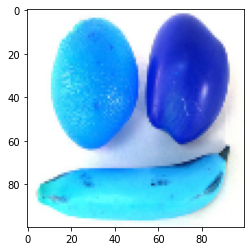

In [22]:
print(labels[4])
plt.imshow(images[4])

In [12]:
# Creating a Sequential model
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout
from keras.models import Sequential

# Creating a Sequential model
model= Sequential()
model.add(Conv2D(kernel_size=(3,3), filters=32, activation='tanh', input_shape=(100,100,3,)))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='tanh'))

model.add(Flatten())

model.add(Dense(20,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(4,activation = 'softmax'))
    
model.compile(
              loss='categorical_crossentropy', 
              metrics=['acc'],
              optimizer='adam'
             )

# Model Summary
model.summary()



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 96, 96, 30)        8670      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 48, 48, 30)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 46, 46, 30)        8130      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 23, 23, 30)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 21, 21, 30)        8130      
_________________________________________________________________
flatten_1 (Flatten)          (None, 13230)            

In [13]:
# Training the model
predict = model.fit(x_train,y_train,epochs=50,batch_size=50,validation_data=(x_val,y_val))

Epoch 1/50
4/4 [==============================] - 6s 1s/step - loss: 1.7223 - acc: 0.3462 - val_loss: 1.3939 - val_acc: 0.2667
Epoch 2/50
4/4 [==============================] - 5s 1s/step - loss: 1.2645 - acc: 0.4111 - val_loss: 1.7773 - val_acc: 0.1833
Epoch 3/50
4/4 [==============================] - 5s 1s/step - loss: 1.3538 - acc: 0.3516 - val_loss: 1.1783 - val_acc: 0.4500
Epoch 4/50
4/4 [==============================] - 5s 1s/step - loss: 1.0006 - acc: 0.5596 - val_loss: 1.0771 - val_acc: 0.5833
Epoch 5/50
4/4 [==============================] - 5s 1s/step - loss: 0.8990 - acc: 0.6291 - val_loss: 0.9453 - val_acc: 0.6500
Epoch 6/50
4/4 [==============================] - 5s 1s/step - loss: 0.7563 - acc: 0.6669 - val_loss: 0.9265 - val_acc: 0.6500
Epoch 7/50
4/4 [==============================] - 5s 1s/step - loss: 0.6493 - acc: 0.7671 - val_loss: 0.8515 - val_acc: 0.7500
Epoch 8/50
4/4 [==============================] - 5s 1s/step - loss: 0.5915 - acc: 0.8789 - val_loss: 0.7863 - 

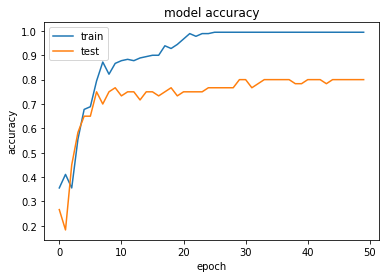

In [19]:
# summarize history for accuracy
plt.plot(predict.history['acc'])
plt.plot(predict.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

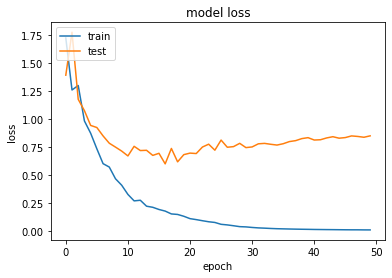

In [20]:
# summarize history for loss
plt.plot(predict.history['loss'])
plt.plot(predict.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()